In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def rmse(y,y_hat):
    return np.sqrt(mean_squared_error(y,y_hat))

In [2]:
data = pd.read_csv('FINAL_DATASET.csv')
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,0,C,16,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,0,C,15,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,C,30,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,0,5,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,C,27,0,0


In [3]:
data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS', 'NO_OF_GOOD', 'NO_OF_BAD', 'FINAL_LABEL'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30696 entries, 0 to 30695
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   30696 non-null  int64  
 1   CODE_GENDER          30696 non-null  object 
 2   FLAG_OWN_CAR         30696 non-null  object 
 3   FLAG_OWN_REALTY      30696 non-null  object 
 4   CNT_CHILDREN         30696 non-null  int64  
 5   AMT_INCOME_TOTAL     30696 non-null  float64
 6   NAME_INCOME_TYPE     30696 non-null  object 
 7   NAME_EDUCATION_TYPE  30696 non-null  object 
 8   NAME_FAMILY_STATUS   30696 non-null  object 
 9   NAME_HOUSING_TYPE    30696 non-null  object 
 10  DAYS_BIRTH           30696 non-null  int64  
 11  DAYS_EMPLOYED        30696 non-null  int64  
 12  FLAG_MOBIL           30696 non-null  int64  
 13  FLAG_WORK_PHONE      30696 non-null  int64  
 14  FLAG_PHONE           30696 non-null  int64  
 15  FLAG_EMAIL           30696 non-null 

In [5]:
num_cols = ['CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS']
nom_cols = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','OCCUPATION_TYPE']
ord_cols = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_EDUCATION_TYPE','STATUS']
drop_cols = ['']
skip_cols = ['ID','STATUS','NO_OF_GOOD','NO_OF_BAD','FINAL_LABEL']

In [6]:
num_pipeline = Pipeline([('Simple Imputer',SimpleImputer),('Scalar',StandardScaler)])
nom_pipeline = Pipeline([('One Hot Encoder',OneHotEncoder)])
ord_pipeline = Pipeline([('Ordinal Encoder',OrdinalEncoder)])

In [7]:
pipeline = ColumnTransformer([('numerical pipeline',num_pipeline,num_cols),
                              ('nominal pipeline',nom_pipeline,nom_cols),
                              ('ordinal pipeline',ord_pipeline,ord_cols),
                              ('drop pipeline','drop',drop_cols),
                              ('skip pipeline','passthrough',skip_cols)])

In [8]:
op_cols=['ID','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_EMAIL','OCCUPATION_TYPE']

## Encoding nominal data

In [9]:
encoder = OneHotEncoder(sparse=False)

In [10]:
encoded_data = encoder.fit_transform(data[nom_cols])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
cols = encoder.get_feature_names_out()

In [12]:
encoded_df = pd.DataFrame(encoded_data,columns=cols)

In [13]:
print(encoded_df)

       CODE_GENDER_F  CODE_GENDER_M  FLAG_OWN_CAR_N  FLAG_OWN_CAR_Y  \
0                0.0            1.0             0.0             1.0   
1                0.0            1.0             0.0             1.0   
2                0.0            1.0             0.0             1.0   
3                1.0            0.0             1.0             0.0   
4                1.0            0.0             1.0             0.0   
...              ...            ...             ...             ...   
30691            0.0            1.0             0.0             1.0   
30692            1.0            0.0             1.0             0.0   
30693            1.0            0.0             1.0             0.0   
30694            1.0            0.0             1.0             0.0   
30695            0.0            1.0             1.0             0.0   

       FLAG_OWN_REALTY_N  FLAG_OWN_REALTY_Y  \
0                    0.0                1.0   
1                    0.0                1.0   
2     

In [14]:
cols_to_drop = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','OCCUPATION_TYPE']
data.drop(cols_to_drop,axis=1)

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL
0,5008804,0,427500.0,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C,16,0,0
1,5008805,0,427500.0,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C,15,0,0
2,5008806,0,112500.0,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,0,C,30,0,0
3,5008808,0,270000.0,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,0,0,5,0,0
4,5008810,0,270000.0,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,0,C,27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,5149828,0,315000.0,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,2.0,0,5,8,4,1
30692,5149834,0,157500.0,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,2.0,0,C,13,11,1
30693,5149838,0,157500.0,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,2.0,0,C,22,11,1
30694,5150049,0,283500.0,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,2.0,0,2,9,1,1


In [15]:
f_data1 = pd.concat([data,encoded_df],axis = 1)

## Encoding ordinal data

In [16]:
encoder2 = OrdinalEncoder()

In [17]:
encoded_dt2 = encoder2.fit_transform(data[ord_cols])

In [18]:
cols2 = encoder2.get_feature_names_out()

In [19]:
encoded_dt2 = pd.DataFrame(encoded_dt2,columns = cols2)

In [20]:
cols_to_drop2 = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_EDUCATION_TYPE','STATUS']

In [21]:
f_data2 = f_data1.update(encoded_dt2[cols_to_drop2])
f_data2 = pd.DataFrame(f_data2,columns = cols2)

In [22]:
f_data1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,1.0,1.0,1.0,0,427500.0,Working,1.0,Civil marriage,Rented apartment,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5008805,1.0,1.0,1.0,0,427500.0,Working,1.0,Civil marriage,Rented apartment,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5008806,1.0,1.0,1.0,0,112500.0,Working,4.0,Married,House / apartment,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5008808,0.0,0.0,1.0,0,270000.0,Commercial associate,4.0,Single / not married,House / apartment,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5008810,0.0,0.0,1.0,0,270000.0,Commercial associate,4.0,Single / not married,House / apartment,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,5149828,1.0,1.0,1.0,0,315000.0,Working,4.0,Married,House / apartment,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30692,5149834,0.0,0.0,1.0,0,157500.0,Commercial associate,1.0,Married,House / apartment,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30693,5149838,0.0,0.0,1.0,0,157500.0,Pensioner,1.0,Married,House / apartment,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30694,5150049,0.0,0.0,1.0,0,283500.0,Working,4.0,Married,House / apartment,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Scaling numerical data

In [23]:
Std_sc = StandardScaler()

In [24]:
num_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS']

In [25]:
f_data3 = Std_sc.fit_transform(data[num_cols])

In [26]:
type(f_data3)

numpy.ndarray

In [27]:
f_data3 = pd.DataFrame(f_data3,columns=num_cols)

In [28]:
cols_to_replace = {'CNT_CHILDREN':'CNT_CHILDREN',
 'AMT_INCOME_TOTAL':'AMT_INCOME_TOTAL',
 'DAYS_BIRTH':'DAYS_BIRTH',
 'DAYS_EMPLOYED':'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS':'CNT_FAM_MEMBERS'}

In [29]:
f_data1.update(f_data3[cols_to_replace])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16744\1340488537.py:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  f_data1.update(f_data3[cols_to_replace])


In [30]:
pd.set_option('display.max_columns',None)

In [31]:
f_data1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,FLAG_MOBIL_1,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,1.0,1.0,1.0,-0.574091,2.353779,Working,1.0,Civil marriage,Rented apartment,0.936726,-0.461995,1,1,0,0,Other,-0.21499,0,6.0,16,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5008805,1.0,1.0,1.0,-0.574091,2.353779,Working,1.0,Civil marriage,Rented apartment,0.936726,-0.461995,1,1,0,0,Other,-0.21499,0,6.0,15,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5008806,1.0,1.0,1.0,-0.574091,-0.730115,Working,4.0,Married,House / apartment,-1.312254,-0.437170,1,0,0,0,Security staff,-0.21499,0,6.0,30,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5008808,0.0,0.0,1.0,-0.574091,0.811832,Commercial associate,4.0,Single / not married,House / apartment,-0.750781,-0.451134,1,0,1,1,Sales staff,-1.30832,0,0.0,5,0,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5008810,0.0,0.0,1.0,-0.574091,0.811832,Commercial associate,4.0,Single / not married,House / apartment,-0.750781,-0.451134,1,0,1,1,Sales staff,-1.30832,0,6.0,27,0,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,5149828,1.0,1.0,1.0,-0.574091,1.252388,Working,4.0,Married,House / apartment,-0.332289,-0.446538,1,0,0,0,Managers,-0.21499,0,5.0,8,4,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30692,5149834,0.0,0.0,1.0,-0.574091,-0.289559,Commercial associate,1.0,Married,House / apartment,0.845997,-0.438561,1,0,1,1,Medicine staff,-0.21499,0,6.0,13,11,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30693,5149838,

In [32]:
f_data1.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS', 'NO_OF_GOOD', 'NO_OF_BAD', 'FINAL_LABEL', 'CODE_GENDER_F',
       'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_FAMILY_STATUS_Civil marriage',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment'

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
from sklearn.model_selection import StratifiedKFold

In [35]:
f_data5 = f_data1

In [36]:
f_data5 = f_data5.drop(['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE'],axis=1)

In [37]:
f_data5.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,FLAG_MOBIL_1,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,1.0,1.0,1.0,-0.574091,2.353779,1.0,0.936726,-0.461995,-0.21499,0,6.0,16,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5008805,1.0,1.0,1.0,-0.574091,2.353779,1.0,0.936726,-0.461995,-0.21499,0,6.0,15,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5008806,1.0,1.0,1.0,-0.574091,-0.730115,4.0,-1.312254,-0.437170,-0.21499,0,6.0,30,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5008808,0.0,0.0,1.0,-0.574091,0.811832,4.0,-0.750781,-0.451134,-1.30832,0,0.0,5,0,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5008810,0.0,0.0,1.0,-0.574091,0.811832,4.0,-0.750781,-0.451134,-1.30832,0,6.0,27,0,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,5008811,0.0,0.0,1.0,-0.574091,0.811832,4.0,-0.750781,-0.451134,-1.30832,0,6.0,39,0,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,5008812,0.0,0.0,1.0,-0.574091,0.943999,1.0,-1.547389,2.231608,-1.30832,-4,0.0,17,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5008813,0.0,0.0,1.0,-0.574091,0.943999,1.0,-1.547389,2.231608,-1.30832,0,0.0,17,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5008814,0.0,0.0,1.0,-0.574091,0.943999,1.0,-1.547389,2.231608,-1.30832,-1,0.0,17,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5008815,1.0,1.0,1.0,-0.574091,0.811832,1.0,-0.219234,-0.434511,-0.21499,0,0.0,6,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
f_data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30696 entries, 0 to 30695
Data columns (total 57 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       30696 non-null  int64  
 1   CODE_GENDER                              30696 non-null  object 
 2   FLAG_OWN_CAR                             30696 non-null  object 
 3   FLAG_OWN_REALTY                          30696 non-null  object 
 4   CNT_CHILDREN                             30696 non-null  float64
 5   AMT_INCOME_TOTAL                         30696 non-null  float64
 6   NAME_EDUCATION_TYPE                      30696 non-null  object 
 7   DAYS_BIRTH                               30696 non-null  float64
 8   DAYS_EMPLOYED                            30696 non-null  float64
 9   CNT_FAM_MEMBERS                          30696 non-null  float64
 10  MONTHS_BALANCE                           30696

In [39]:
f_data5['CODE_GENDER'] = f_data5['CODE_GENDER'].astype('float64')

In [40]:
f_data5['FLAG_OWN_CAR'] = f_data5['FLAG_OWN_CAR'].astype('float64')

In [41]:
f_data5['FLAG_OWN_REALTY'] = f_data5['FLAG_OWN_REALTY'].astype('float64')

In [42]:
f_data5['NAME_EDUCATION_TYPE'] = f_data5['NAME_EDUCATION_TYPE'].astype('float64')

In [43]:
f_data5['STATUS'] = f_data5['STATUS'].astype('float64')

In [44]:
f_data6 = f_data5[num_cols]

In [45]:
f_data6.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,-0.574091,2.353779,0.936726,-0.461995,-0.21499
1,-0.574091,2.353779,0.936726,-0.461995,-0.21499
2,-0.574091,-0.730115,-1.312254,-0.437170,-0.21499
3,-0.574091,0.811832,-0.750781,-0.451134,-1.30832
4,-0.574091,0.811832,-0.750781,-0.451134,-1.30832


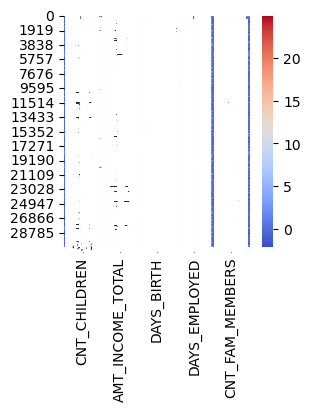

In [46]:
plt.figure(figsize=(3,3))
sns.heatmap(f_data6,annot=True,cmap='coolwarm')
plt.show()

In [47]:
matrix = f_data6.corr()

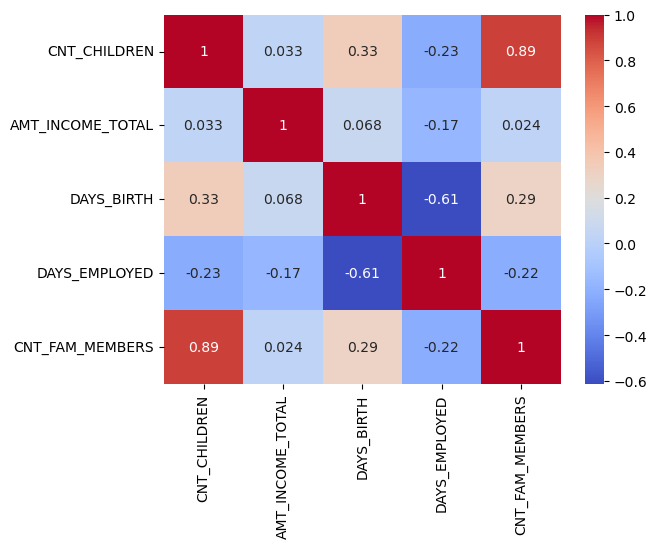

In [48]:
sns.heatmap(matrix,annot=True,cmap='coolwarm')
plt.show()

In [49]:
type(f_data6)

pandas.core.frame.DataFrame

In [50]:
#fig,axes = plt.subplots(ncols=5,nrows=5)
#num=5
#for ax in axes.flat:
#    for x in 5:
#        for y in 5:
#            ax.scatter(f_data6.iloc[:,x],f_data6.iloc[:,y])
#    #sns.scatterplot(x=y,y=x,ax=axes[x])
#plt.show()

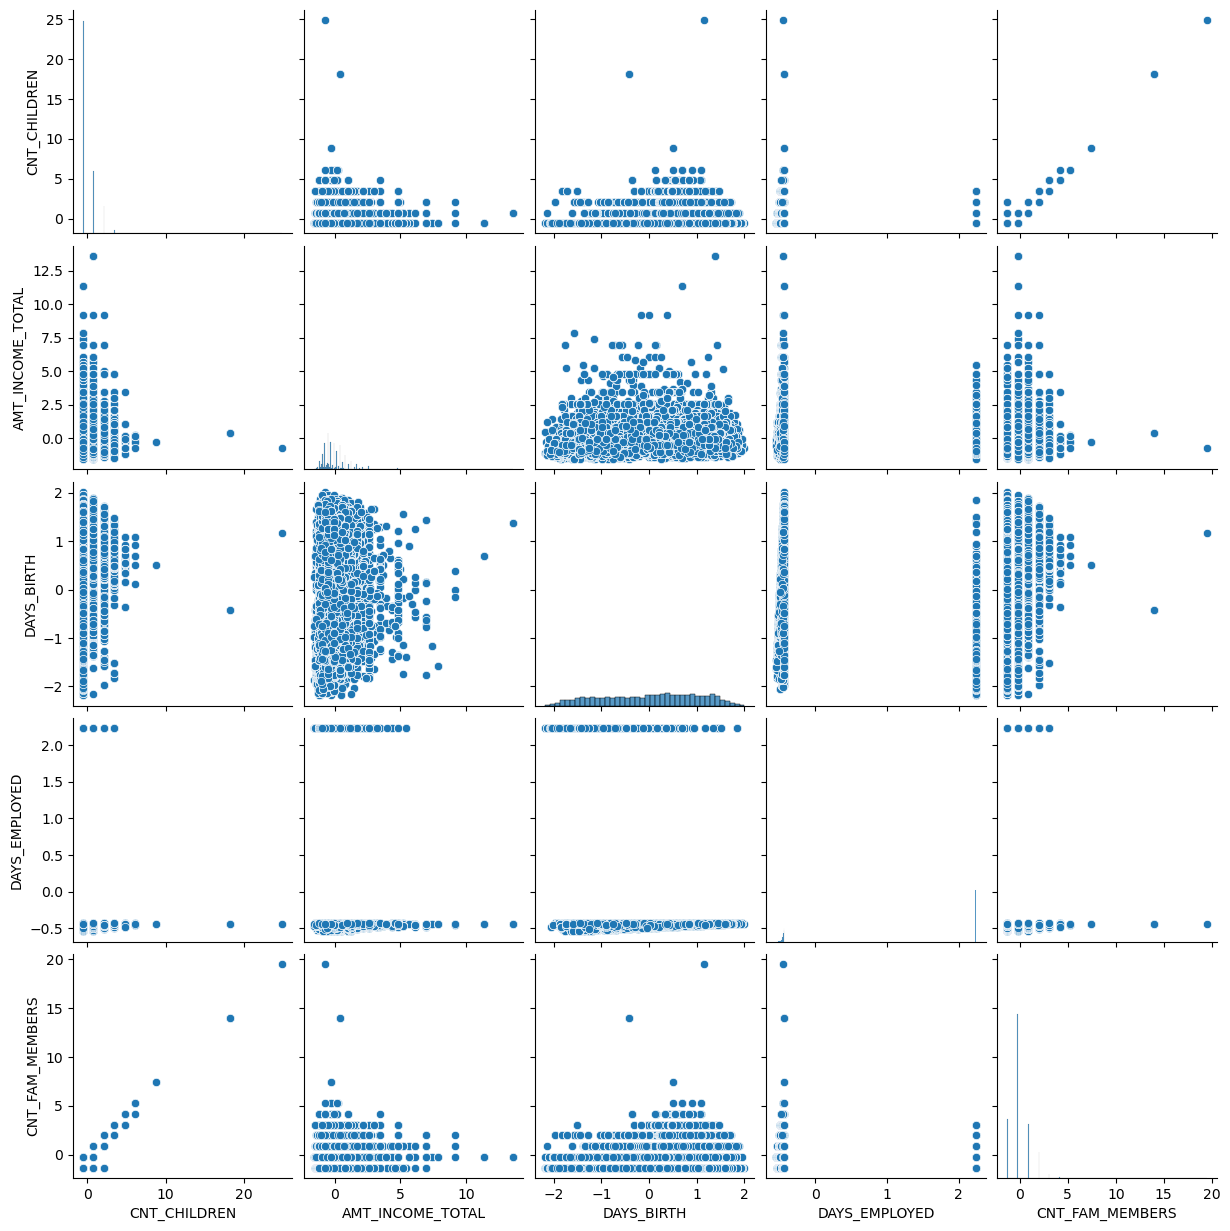

In [51]:
sns.pairplot(f_data6)
plt.show()

In [52]:
f_data1[['NAME_INCOME_TYPE','OCCUPATION_TYPE','NAME_HOUSING_TYPE']]

,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_HOUSING_TYPE
0,Working,Other,Rented apartment
1,Working,Other,Rented apartment
2,Working,Security staff,House / apartment
3,Commercial associate,Sales staff,House / apartment
4,Commercial associate,Sales staff,House / apartment
...,...,...,...
30691,Working,Managers,House / apartment
30692,Commercial associate,Medicine staff,House / apartment
30693,Pensioner,Medicine staff,House / apartment
30694,Working,Sales staff,House / apartment


In [53]:
f_data8 = f_data1

In [54]:
y = f_data8['FINAL_LABEL']
x = f_data8[num_cols]
x.corrwith(y)

CNT_CHILDREN        0.000759
AMT_INCOME_TOTAL   -0.001202
DAYS_BIRTH          0.000973
DAYS_EMPLOYED       0.006708
CNT_FAM_MEMBERS    -0.005545
dtype: float64

In [55]:
from sklearn.feature_selection import mutual_info_classif

In [56]:
y=f_data8['FINAL_LABEL']
X = f_data5
X = X.drop(['FINAL_LABEL'],axis=1)
mi_scores = mutual_info_classif(X,y)

In [57]:
mi_scores

array([1.69799287e-02, 1.96740761e-03, 2.55626282e-03, 5.04380115e-03,
       8.39864265e-04, 1.13945156e-03, 3.82482633e-03, 1.99362825e-02,
       1.06923816e-02, 1.51774429e-03, 2.58485223e-03, 1.83508205e-02,
       9.46934684e-04, 9.52630964e-02, 5.89710822e-03, 2.87734786e-03,
       5.09152585e-03, 3.70754841e-03, 2.76880246e-03, 7.13906132e-03,
       2.02475138e-03, 0.00000000e+00, 0.00000000e+00, 8.91820746e-04,
       3.68648649e-03, 9.15637614e-04, 5.05994529e-03, 1.19150598e-03,
       0.00000000e+00, 2.33641640e-04, 6.97532586e-04, 6.78274519e-03,
       0.00000000e+00, 4.23531958e-04, 0.00000000e+00, 4.84007410e-04,
       8.20536537e-03, 4.33320108e-04, 0.00000000e+00, 0.00000000e+00,
       1.01498817e-03, 0.00000000e+00, 1.75856413e-04, 3.17083979e-05,
       0.00000000e+00, 8.01336324e-04, 1.76131491e-03, 0.00000000e+00,
       0.00000000e+00, 1.12357879e-03, 0.00000000e+00, 1.90573089e-04,
       0.00000000e+00, 1.15569070e-03, 0.00000000e+00, 7.23671153e-04])

In [58]:
from sklearn.feature_selection import SelectKBest

In [59]:
mi_sc_series = pd.Series(mi_scores,index=X.columns)
mi_sc_series

ID                                         0.016980
CODE_GENDER                                0.001967
FLAG_OWN_CAR                               0.002556
FLAG_OWN_REALTY                            0.005044
CNT_CHILDREN                               0.000840
AMT_INCOME_TOTAL                           0.001139
NAME_EDUCATION_TYPE                        0.003825
DAYS_BIRTH                                 0.019936
DAYS_EMPLOYED                              0.010692
CNT_FAM_MEMBERS                            0.001518
MONTHS_BALANCE                             0.002585
STATUS                                     0.018351
NO_OF_GOOD                                 0.000947
NO_OF_BAD                                  0.095263
CODE_GENDER_F                              0.005897
CODE_GENDER_M                              0.002877
FLAG_OWN_CAR_N                             0.005092
FLAG_OWN_CAR_Y                             0.003708
FLAG_OWN_REALTY_N                          0.002769
FLAG_OWN_REA

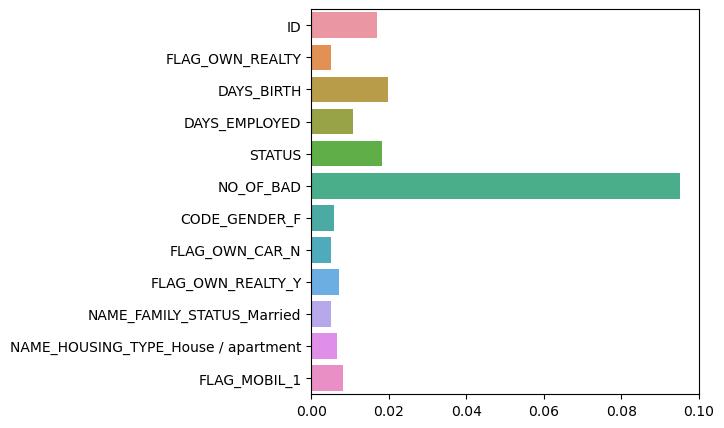

In [90]:
filtered_scores = mi_sc_series[mi_sc_series >= 0.005]
filtered_feature_names = filtered_scores.index
plt.figure(figsize=(5,5))
sns.barplot(x=filtered_scores,y=filtered_feature_names)
plt.show()

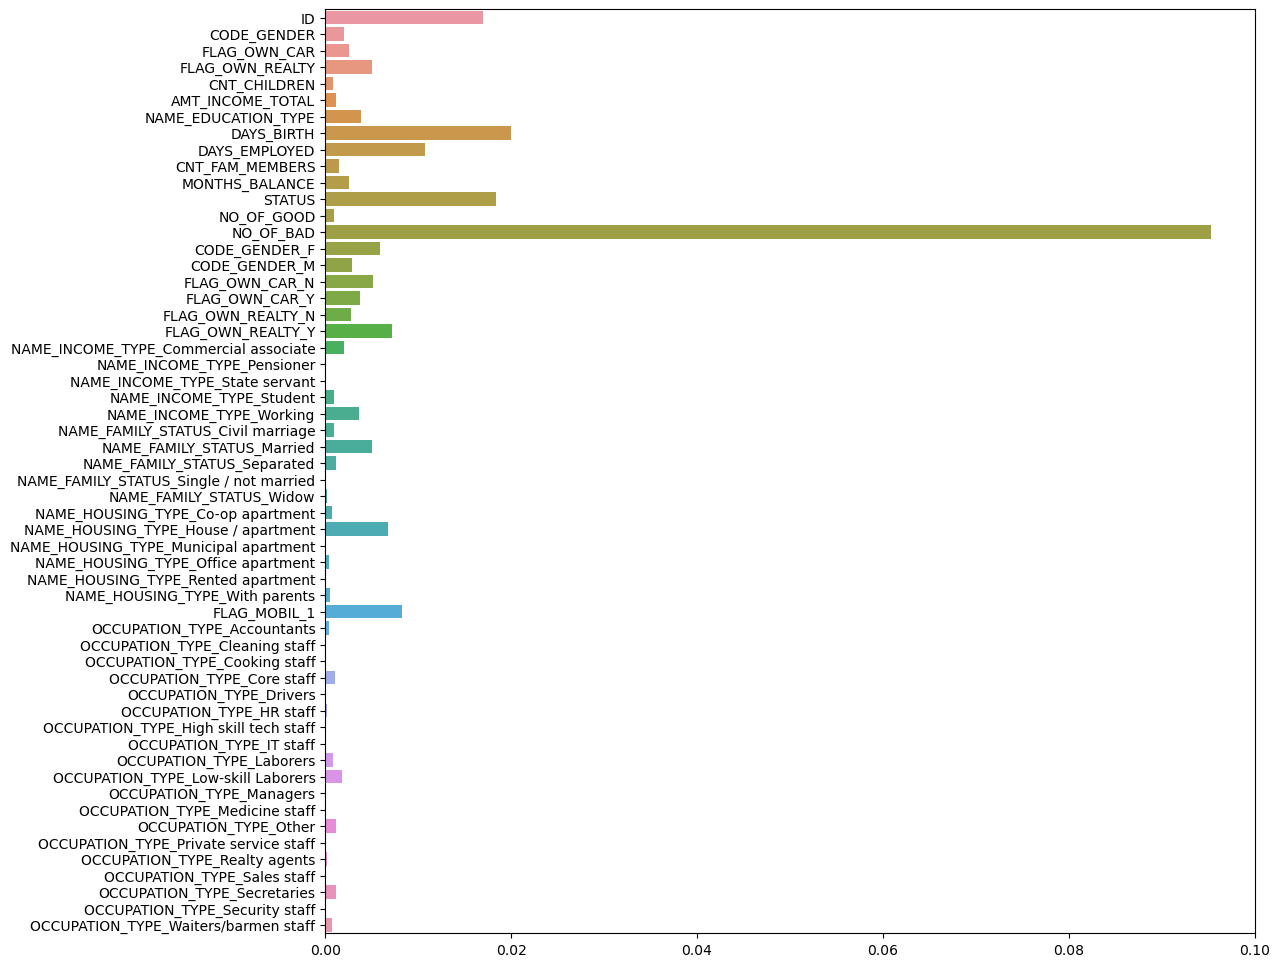

In [71]:
plt.figure(figsize=(12,12))
#filtered_cols = mi_scores.index
sns.barplot(x=mi_scores,y=X.columns)
plt.show()

In [62]:
z=X.corrwith(y)
z

ID                                         0.013991
CODE_GENDER                                0.018643
FLAG_OWN_CAR                              -0.004188
FLAG_OWN_REALTY                           -0.022774
CNT_CHILDREN                               0.000759
AMT_INCOME_TOTAL                          -0.001202
NAME_EDUCATION_TYPE                       -0.004527
DAYS_BIRTH                                 0.000973
DAYS_EMPLOYED                              0.006708
CNT_FAM_MEMBERS                           -0.005545
MONTHS_BALANCE                             0.042698
STATUS                                     0.005537
NO_OF_GOOD                                 0.061732
NO_OF_BAD                                  0.553830
CODE_GENDER_F                             -0.018643
CODE_GENDER_M                              0.018643
FLAG_OWN_CAR_N                             0.004188
FLAG_OWN_CAR_Y                            -0.004188
FLAG_OWN_REALTY_N                          0.022774
FLAG_OWN_REA

In [72]:
feature_names = X.columns

In [73]:
threshold_corr = 0.0009
threshold_mutual_info = 0.001
threshold_features = feature_names[(mi_scores>threshold_mutual_info) & (z>threshold_corr)]

In [74]:
type(threshold_features)

pandas.core.indexes.base.Index

## Oversampling 

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
smote = SMOTE(sampling_strategy='minority')

In [66]:
X_resampled,y_resampled = smote.fit_resample(X,y)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_resampled

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,NO_OF_GOOD,NO_OF_BAD,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,FLAG_MOBIL_1,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,1.000000,1.0,1.000000,-0.574091,2.353779,1.000000,0.936726,-0.461995,-0.214990,0,6.000000,16,0,0.000000,1.000000,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,5008805,1.000000,1.0,1.000000,-0.574091,2.353779,1.000000,0.936726,-0.461995,-0.214990,0,6.000000,15,0,0.000000,1.000000,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,5008806,1.000000,1.0,1.000000,-0.574091,-0.730115,4.000000,-1.312254,-0.437170,-0.214990,0,6.000000,30,0,0.000000,1.000000,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0
3,5008808,0.000000,0.0,1.000000,-0.574091,0.811832,4.000000,-0.750781,-0.451134,-1.308320,0,0.000000,5,0,1.000000,0.000000,1.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0
4,5008810,0.000000,0.0,1.000000,-0.574091,0.811832,4.000000,-0.750781,-0.451134,-1.308320,0,6.000000,27,0,1.000000,0.000000,1.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60203,5065330,0.000000,0.0,0.899644,0.631520,-0.289559,1.301069,-0.007874,-0.458105,0.768617,0,6.100356,32,8,1.000000,0.000000,1.0,0.0,0.100356,0.899644,0.100356,0.000000,0.899644,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.899644,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.100356,0.0,0.0,0.0,0.0,0.000000,0.0
60204,5117134,0.000000,0.0,1.000000,-0.574091,0.811832,1.000000,1.320304,-0.434708,-1.308320,0,6.000000,23,2,1.000000,0.000000,1.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0

In [69]:
X_resampled.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS',
       'NO_OF_GOOD', 'NO_OF_BAD', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents'

In [75]:
threshold_features = pd.DataFrame(threshold_features)

In [76]:
cs = threshold_features[0]

In [77]:
type(columns)

NameError: name 'columns' is not defined

In [78]:
type(threshold_features)

pandas.core.frame.DataFrame

In [79]:
X_resampled.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS',
       'NO_OF_GOOD', 'NO_OF_BAD', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents'

In [80]:
columns=['ID','CODE_GENDER','DAYS_BIRTH','DAYS_EMPLOYED','STATUS','NO_OF_GOOD','NO_OF_BAD','CODE_GENDER_M','FLAG_OWN_CAR_N','FLAG_OWN_REALTY_N','NAME_FAMILY_STATUS_Single / not married','OCCUPATION_TYPE_Low-skill Laborers']

In [81]:
X_new = X_resampled[['ID','CODE_GENDER','DAYS_BIRTH','DAYS_EMPLOYED','STATUS','NO_OF_GOOD','NO_OF_BAD','CODE_GENDER_M','FLAG_OWN_CAR_N','FLAG_OWN_REALTY_N','NAME_FAMILY_STATUS_Single / not married','OCCUPATION_TYPE_Low-skill Laborers']]

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y_resampled,test_size=0.2,random_state=42)

In [83]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [84]:
models = [SVC(kernel='poly'),SGDClassifier(),LogisticRegression(),GaussianNB(),KNeighborsClassifier()]

In [85]:
from sklearn.metrics import f1_score, confusion_matrix

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
def generate_models_report(models,X_train_tr,y_train,X_test_tr,y_test):
    width = 116
    print("_" * width)
    title = "|{:^30}|{:^20}|{:^20}|{:^20}|{:^20}|"
    print(title.format("model name","train error","test error","train accuracy","test accuracy"))
    print("-"*width)
    row = "|{:^30}|{:^20.2f}|{:^20.2f}|{:^20.2f}|{:^20.2f}|"

    for model in models:
        model.fit(X_train_tr,y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        cm_train = confusion_matrix(y_train,y_hat_train)
        total_samples_train = cm_train.sum()
        cm_test = confusion_matrix(y_test,y_hat_test)
        total_samples_test = cm_test.sum()
        train_accuracy = accuracy_score(y_train,y_hat_train)
        test_accuracy = accuracy_score(y_test,y_hat_test)
        train_error = 1-(cm_train.diagonal().sum())/total_samples_train
        test_error = 1-(cm_test.diagonal().sum())/total_samples_test
        model_name = str(model)
        print(row.format(model_name,train_error*100,test_error*100,train_accuracy * 100,test_accuracy * 100))
        print("-"*width)

In [88]:
generate_models_report(models,X_train,y_train,X_test,y_test)

____________________________________________________________________________________________________________________
|          model name          |    train error     |     test error     |   train accuracy   |   test accuracy    |
--------------------------------------------------------------------------------------------------------------------
|      SVC(kernel='poly')      |       47.63        |       47.22        |       52.37        |       52.78        |
--------------------------------------------------------------------------------------------------------------------
|       SGDClassifier()        |       49.79        |       50.83        |       50.21        |       49.17        |
--------------------------------------------------------------------------------------------------------------------
|     LogisticRegression()     |       49.79        |       50.83        |       50.21        |       49.17        |
----------------------------------------------------------------

In [ ]:
model = RandomForestClassifier(n_estimators=400)
model.fit(X_train,y_train)
y_hat_train = model.predict(X_train)
#y_hat_test = model.predict(X_test_tr)
cm_train = confusion_matrix(y_train,y_hat_train)
print(cm_train)